In [8]:
# ===================================
# !!! SET UP PATH AND MERGE FILES !!!
# ===================================

import csv
import numpy as np
import pandas as pd

trials = 10000
path = '/home/ambra/Desktop/cluster-morgana/run0406_%dx/run0406/run0406_ID000126/csv/' %trials

Nchunk = 30

texp = [1,5,10,100]
sigma = [5]
chunk = [i+1 for i in range(Nchunk)]

#csvName[texp][chunk]
csvName = [[]*i for i in range(len(texp))]
for i in range(len(chunk)) :  
    for j in range(len(texp)) :
        csvName[j].append('run0406_v07_%ds_chunk%02d.csv' % (texp[j], chunk[i]))
#        print(csvName[j][i])
        
# merge files ---!
csvMerged= []
for j in range(len(texp)) :
    csvMerged.append('run0406_%dx_%ds.csv' % (trials,texp[j]))

    fout = open(path+csvMerged[j],'w+')
    # first file ---!
    for line in open(path+csvName[j][0]):
        fout.write(line)
    # remaining files ---!    
    for i in range(len(chunk)-1):
        f = open(path+csvName[j][i+1])
        next(f) # skip the header ---!
        for line in f:
             fout.write(line)
        f.close() 
    fout.close()
    
print(csvMerged)

['run0406_10000x_1s.csv', 'run0406_10000x_5s.csv', 'run0406_10000x_10s.csv', 'run0406_10000x_100s.csv']


In [23]:
# ===================================
# !!! NORMED HISTOGRAMS FUNCTIONS !!!
# ===================================

import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib.patches import Rectangle
from scipy.stats import rayleigh, norm
from matplotlib.lines import Line2D
from scipy.signal import find_peaks


width = 0.01
width_tsv = 25
suffix1 = '_wbin%.2f' % width
suffix2 = '_fit'

extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
extra2 = Line2D([0], [0], ls='-.', color='k', lw='1')


# =================== HISTOGRAM 1D  ========================

def plot_tsv_norm(ax, filename, mean, density=False):

    nbin = int(round((max(tsv)-min(tsv))/width_tsv))
    wbin = (max(tsv)-min(tsv))/nbin
    
    if density == False :
        height, binEdges = np.histogram(tsv, bins=nbin, density=False, range=(min(tsv), max(tsv)))
        height_norm = height/trials
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        error_norm = np.sqrt(height)/trials

        hist = ax.bar(binEdges[:-1], height_norm, width=wbin, color='b', yerr=error_norm, align='edge')
        plt.ylabel('normalized cts', fontsize=16)

    else :
#        height, binEdges = np.histogram(tsv, bins=nbin, density=False, range=(min(tsv), max(tsv)))
#        height_norm = height/trials*width
#        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
#        error_norm = np.sqrt(height)/trials*width

#        hist = ax.bar(binEdges[:-1], height_norm, width=wbin, color='b', yerr=error_norm, align='edge')
#        fit = ax.plot(np.sort(tsv), norm.pdf(np.sort(tsv),loc=np.nanmean(tsv)))
        
        sns.distplot(tsv, hist=True, kde=False, fit=norm, hist_kws={'alpha':0.8})
        hist = Rectangle((0, 0), 1, 1, fc="b", fill=True, edgecolor='b', linewidth=1, alpha=0.5)
        
        plt.ylabel('cts density', fontsize=16)

        
    m = ax.axvline(mean, color='k', linewidth=2, ls='-.')
#    fit = ax.plot(np.sort(tsv), norm.pdf(np.sort(tsv), loc=mean), color='k', lw=2, ls='--')
    
    plt.xlabel('Test Statistic Value [$\\approx \\sigma^2$]', fontsize=16)
    plt.title('TS distribution for texp=%ds' %(texp[n]), fontsize=16)
    
    label_perc = '%.2f'%perc+'$\%$ trials'
    ax.legend([extra, hist, m], ('wbin=%d' %width_tsv, label_perc, 'mean $\\approx$ %d' %mean), loc=0)
    
    # savefig ---!
    figname = '_tsv'
    extent = ax.get_window_extent().transformed(fig_hist.dpi_scale_trans.inverted())
    fig_hist.savefig(filename.replace('.csv', figname+'%s.png' %suffix2), bbox_inches=extent.expanded(1.3, 1.4))

    
    
    
def plot_det_norm(ax, filename, mean_near, density=False):
    
    nbin = int(0.5 / width)
    
    if density == False : 
        height, binEdges = np.histogram(distance_det, bins=nbin, density=False, range=(0, 0.5))
        height_norm = height/trials
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        error_norm = np.sqrt(height)/trials

        hist = ax.bar(bincenters, height_norm, width=width, color='g', yerr=error_norm, align='center')
        plt.ylabel('normalized cts', fontsize=16)
        
    else :
        sns.distplot(d_det, bins=nbin, hist=True, kde=False, fit=rayleigh, color='g',
                    hist_kws={'alpha':0.8, 'range':(0, 0.5)})
        hist = Rectangle((0, 0), 1, 1, fc="g", fill=True, edgecolor='g', linewidth=1, alpha=0.5)
#        peak = ax.axvline(rayleigh.mean(d_det), color='k', ls='-.')
        plt.ylabel('cts density', fontsize=16)

        
#    m = ax.axvline(mean, color='k', linewidth=2)
    m_near = ax.axvline(MLE_det, color='k', linewidth=2, ls='-.')
#    fit = ax.plot(distance_det, rayleigh.pdf(distance_det), color='k', lw=2, ls='--')

    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.title('detected Ra/Dec for texp=%ds' %(texp[n]), fontsize=16)  
    ax.set_ylim(bottom=0)
    
    label_perc = '%.2f'%perc+'$\%$ detection'
    label2_perc = '%.2f'%perc_det+'$\%$ within 0.2deg'
    ax.legend([extra, extra, hist, m_near], 
              ('wbin=%.2f deg' %width, label_perc,
               label2_perc, 'mean($<$%.2f) $\\approx$ %.3fdeg' %(threshold, MLE_det)),
               loc=0)

    # save only subplot with padding ---!
    figname = '_detSphDist_histAll'
    extent = ax.get_window_extent().transformed(fig_hist.dpi_scale_trans.inverted())
    fig_hist.savefig(filename.replace('.csv', figname+'%s.png' %suffix1), 
                     bbox_inches=extent.expanded(1.3, 1.4))

    
    
def plot_fit_norm(ax, filename, mean_near, density=False):

    nbin = int(0.5 / width)

    if density == False :

        height, binEdges = np.histogram(distance_fit, bins=nbin, density=False, range=(0, 0.5))
        height_norm = height/trials
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        error_norm = np.sqrt(height)/trials

        hist = ax.bar(bincenters, height_norm, width=width, color='r', yerr=error_norm, align='center')
        plt.ylabel('normalized cts', fontsize=16)


    else :
        dist = sns.distplot(d_fit, bins=nbin, hist=True, kde=False, fit=rayleigh, color='r', 
                     hist_kws={'alpha':0.8, 'range':(0, 0.5)})
        hist = Rectangle((0, 0), 1, 1, fc="r", fill=True, edgecolor='r', linewidth=1, alpha=0.5)
        plt.ylabel('cts density', fontsize=16)    

        
#    m = ax.axvline(mean, color='k', linewidth=2)
    m_near = ax.axvline(MLE_fit, color='k', linewidth=2, ls='-.')
#    fit = ax.plot(distance_fit, rayleigh.pdf(distance_fit), color='k', lw=2, ls='--')

    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.title('fitted Ra/Dec for texp=%ds' %(texp[n]), fontsize=16)
    ax.set_ylim(bottom=0)
    
    label_perc = '%.2f'%perc+'$\%$ detection'
    label2_perc = '%.2f'%perc_fit+'$\%$ within 0.2deg'
    ax.legend([extra, extra, hist, m_near], 
              ('wbin=%.2f deg' %width, label_perc,
               label2_perc, 'MLE ($<$%.2f) $\\approx$ %.3fdeg' %(threshold,MLE_fit)),
               loc=0)
    
    # save only subplot with padding ---!
    figname = '_fitSphDist_histAll'
    extent = ax.get_window_extent().transformed(fig_hist.dpi_scale_trans.inverted())
    fig_hist.savefig(filename.replace('.csv', figname+'%s.png' %suffix1), bbox_inches=extent.expanded(1.3, 1.4))


    
    
    
# ===================== HISTOGRAM 2D  ======================    
    
    
def plot_tsv_det(ax, filename) :
    
    nbin = int(threshold / width)
    ywidth = (max(tsv)-min(tsv))/nbin
    
#    h, xedges, yedges = np.histogram2d(distance_det, tsv, bins=nbin)
#    h_norm = h/trials
#    h_norm = h_norm.T
#    X, Y = np.meshgrid(xedges, yedges)
#    ax.pcolormesh(X, Y, h_norm)
#    ax.imshow(h_norm, cmap='jet')
    h = ax.hist2d(distance_det, tsv, bins=nbin, cmap='jet', normed=True, 
#                  norm = mpl.colors.Normalize(vmin=0., vmax=1),
                  range=[[0,0.2], [min(tsv), max(tsv)]])        
    plt.colorbar(h[3], ax=ax).set_label('normalized cts') 
    
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('Test Statistic Value', fontsize=16)
    plt.title('detection vs TS for texp=%ds' %(texp[n]), fontsize=16)
#    plt.colorbar(ax=ax).set_label('normalized cts') 
    ax.legend([extra, extra], ('x-wbin=0.01deg', 'y-wbin=%d' %int(ywidth)), loc=0)
    
    # save only subplot with padding ---!
    figname = '_tsv2D_detAll'
    extent = ax.get_window_extent().transformed(fig_hist2D.dpi_scale_trans.inverted())
    fig_hist2D.savefig(filename.replace('.csv', figname+'%s.png' %suffix1), bbox_inches=extent.expanded(1.5, 1.4))




def plot_tsv_fit(ax, filename) :
    
    nbin = int(threshold / width)
    
#    h, xedges, yedges = np.histogram2d(distance_det, tsv, bins=nbin)
#    h_norm = h/trials
#    h_norm = h_norm.T
#    X, Y = np.meshgrid(xedges, yedges)
#    ax.pcolormesh(X, Y, h_norm)
#    ax.imshow(h_norm, cmap='jet')
    h = ax.hist2d(d_fit, d_tsv, bins=nbin, cmap='jet', normed=True,
#                  norm = mpl.colors.Normalize(vmin=0., vmax=1),
                  range=[[0,0.2], [min(tsv), max(tsv)]])        
    plt.colorbar(h[3], ax=ax).set_label('normalized cts') 
    
    plt.xlabel('spherical distance from true position $\Delta\\Theta$ (deg)', fontsize=16)
    plt.ylabel('Test Statistic', fontsize=16)
    plt.title('best fit (texp=%ds)' %texp[n], fontsize=16)
    
    # save only subplot with padding ---!
    figname = '_tsv2D_fitAll'
    extent = ax.get_window_extent().transformed(fig_hist2D.dpi_scale_trans.inverted())
    fig_hist2D.savefig(filename.replace('.csv', figname+'%s.png' %suffix1), bbox_inches=extent.expanded(1.5, 1.4))

    



verify trials =  17000
verify trials =  10000
DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 89.19830169830169
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 92.34152652005174
TSV mean: 34.64067332667332 std: 17.246634439534482
DETECTION mean: 0.29486287667743344 std: 0.7626873323940271
DETECTION NEAR mean: 0.04475183380262917 std: 0.028886464863677772
FIT DIST mean: 0.2515546411343544 std: 1.1367427472823872
FIT DITS NEAR mean: 0.03827338558603628 std: 0.025284780294499678


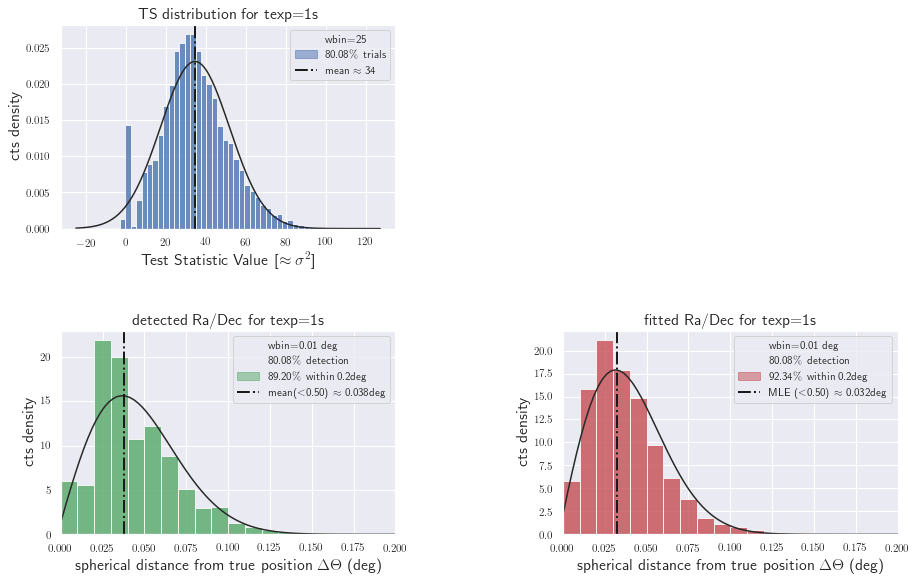

verify trials =  17000
verify trials =  10000
DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
TSV mean: 142.848722316695 std: 36.128886139041285
DETECTION mean: 0.022119874448621502 std: 0.011670849005057358
DETECTION NEAR mean: 0.022119874448621502 std: 0.011670849005057358
FIT DIST mean: 0.017518588132991245 std: 0.009520449252829393
FIT DITS NEAR mean: 0.017518588132991245 std: 0.009520449252829393


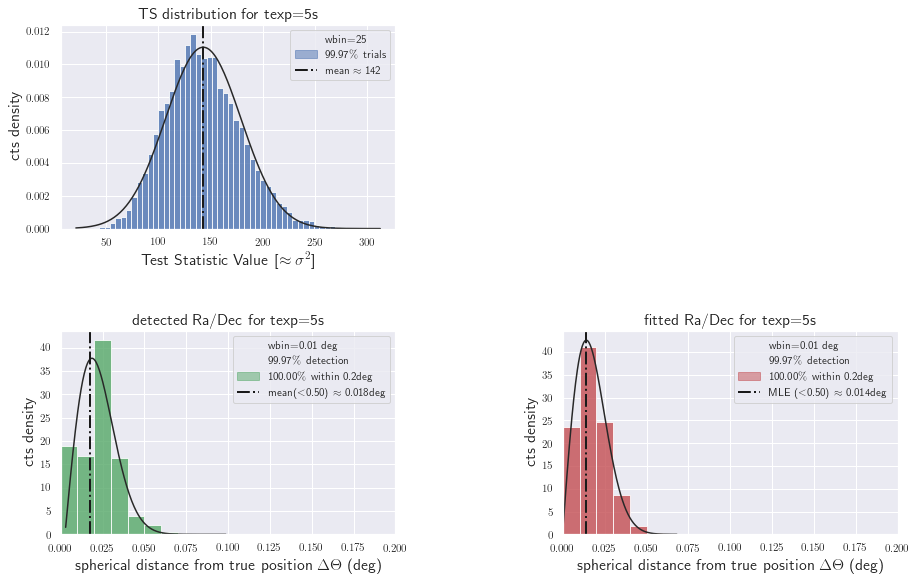

verify trials =  17000
verify trials =  10000
DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
TSV mean: 280.107163 std: 53.63617722825547
DETECTION mean: 0.018105687517257104 std: 0.009174181052332786
DETECTION NEAR mean: 0.018105687517257104 std: 0.009174181052332786
FIT DIST mean: 0.013421528963431332 std: 0.007184322616142799
FIT DITS NEAR mean: 0.013421528963431332 std: 0.007184322616142799


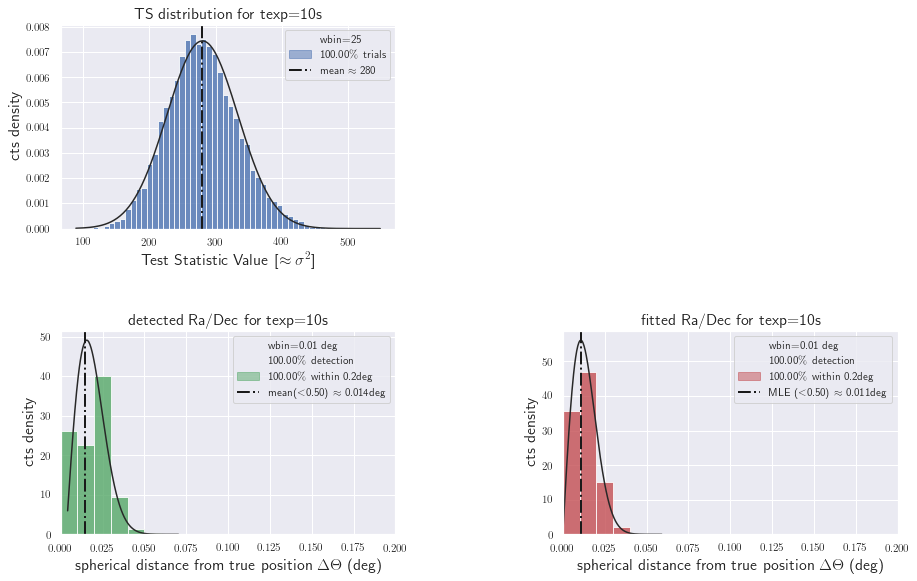

verify trials =  17000
verify trials =  10000
DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 100.0
TSV mean: 2501.3267969999997 std: 185.1251974496443
DETECTION mean: 0.011362683470410253 std: 0.0039016285001603293
DETECTION NEAR mean: 0.011362683470410253 std: 0.0039016285001603293
FIT DIST mean: 0.005906472462849191 std: 0.0031298572293283417
FIT DITS NEAR mean: 0.005906472462849191 std: 0.0031298572293283417


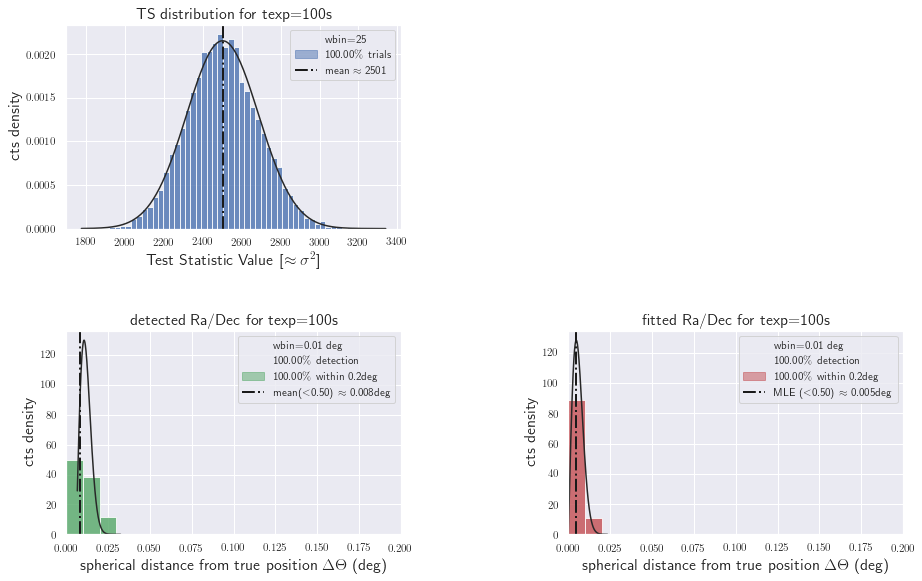

In [10]:
# ===============================
# !!! TSV & RA/DEC HISTOGRAMS !!!
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord

threshold = 0.5


for n in range(len(texp)) :  
    
    # store values ---!
    filename = csvMerged[n]
    
    # load DataFrame and column names ---!
    df = pd.read_csv(path+filename)
    cols = list(df.columns)
    trials = len(df[cols[0]])
    print('verify trials = ', trials)
    # drop duplicates ---! 
    df.sort_values(cols[0], inplace = True) 
    # dropping ALL duplicte values 
    df.drop_duplicates(subset=cols[0], keep='last', inplace=True) 
    trials = len(df[cols[0]])
    print('verify trials = ', trials)
    # drop NaN ---!
    df = df.dropna()
    
    # set arrays ---!
    trial = np.array(df[cols[0]])
    tsv = np.array(df[cols[12]])
    raSrc001 = np.array(df[cols[5]])
    decSrc001 = np.array(df[cols[6]])
    raFit = np.array(df[cols[7]])
    decFit = np.array(df[cols[8]])
#    ra_err = np.array(df[cols[9]])
#    dec_err = np.array(df[cols[10]])


    
    # initialize SphDistance calc ---!
    trueRA = 33.057
    trueDEC = -51.841
    
    perc = 100 * (len(trial)/trials)
    
    distance_det = []
    d_det = []

    # DETECTION ---!
    true_coord = SkyCoord(ra = trueRA*u.deg, dec = trueDEC*u.deg, frame='fk5')
    
    for i in range(len(raSrc001)) :
        if decDet[i] >= -90 and decDet[i] <= 90 and 0 <= raDet[i] <= 360 :
            detect_coord = SkyCoord(ra = raSrc001[i]*u.deg, dec = decSrc001[i]*u.deg, frame='fk5')
            dist = float(true_coord.separation(detect_coord).deg)
            distance_det.append(dist)      

            if dist < threshold :
                d_det.append(dist)

    perc_det = 100 * (len(d_det)/trials)
    perc_det = 100 * (len(d_det)/len(distance_det))
    print('DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION:', perc_det)

    # FIT MAX LIKELIHOOD ---!
    distance_fit = []
    d_fit = []
    d_tsv = []
    
    for i in range(len(raFit)) :
        if decFit[i] >= -90 and decFit[i] <= 90 and 0 <= raFit[i] <= 360 :
            fit_coord = SkyCoord(ra = raFit[i]*u.deg, dec = decFit[i]*u.deg, frame='fk5')
            dist = float(true_coord.separation(fit_coord).deg)
            distance_fit.append(dist)                  
    
            if dist < threshold :
                d_fit.append(dist)
                d_tsv.append(tsv[i])
        
    perc_fit = len(d_fit)/trials * 100
    perc_fit = len(d_fit)/len(distance_fit) * 100
    print('FIT RATIO WITHIN 0.5deg FROM TRUE POSITION:', perc_fit)

    # MEAN ---!
    mean_tsv = np.nanmean(tsv)
    std_tsv = np.nanstd(tsv)
    mean_det = np.nanmean(distance_det)
    mean_det_near = np.nanmean(d_det)
    mean_fit = np.nanmean(distance_fit)
    mean_fit_near = np.nanmean(d_fit)
        
    tmp = 0
    for i in range(len(d_fit)) :
        tmp += d_fit[i]**2
        
    MLE_fit = np.sqrt(1/(2*len(d_fit)) * tmp)
        
    tmp = 0
    for i in range(len(d_det)) :
        tmp += d_det[i]**2
        
    MLE_det = np.sqrt(1/(2*len(d_det)) * tmp)        
        
    print('TSV mean:', mean_tsv, 'std:', std_tsv)
    print('DETECTION mean:', mean_det, 'std:', np.nanstd(distance_det))
    print('DETECTION NEAR mean:', mean_det_near, 'std:', np.nanstd(d_det))
    print('FIT DIST mean:', mean_fit, 'std:', np.nanstd(distance_fit))
    print('FIT DITS NEAR mean:', mean_fit_near, 'std:', np.nanstd(d_fit))

    
    # INITIALIZE PLOT ---!
    fig_hist = plt.figure(figsize=(15, 15))
    plt.rc('text', usetex=True)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.set()
    
    # PLOT TSV ---!
    ax_tsv_norm = plt.subplot(321)
    plot_tsv_norm(ax_tsv_norm, filename, mean_tsv, density=True)
    
    # PLOT FLUX FIT MAX LIKELIHOOD ---!
#    ax_flux = plt.subplot(322)
#    plot_flux(ax_flux, filename)
    
    # PLOT RA&DEC DETECTION ---!    
    ax_det_norm = plt.subplot(323, xlim=(0, 0.2))
    plot_det_norm(ax_det_norm, filename, mean_det_near, density=True) 
        
    # PLOT RA&DEC FIT MAX LIKELIHOOD ---!    
    ax_fit_norm = plt.subplot(324, xlim=(0, 0.2))
    plot_fit_norm(ax_fit_norm, filename, mean_fit_near, density=True) 
    
    
    plt.show()

DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 121.35000000000001
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 121.35000000000001


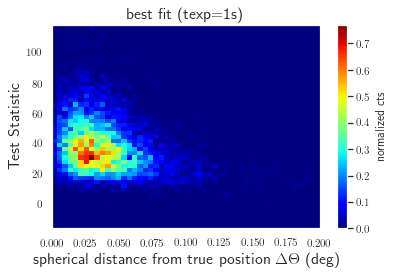

DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 169.94
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 169.94


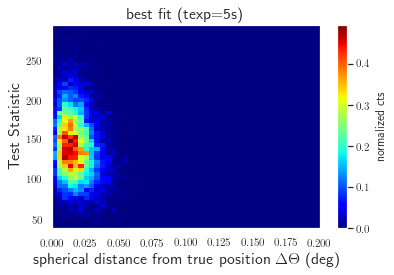

DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 170.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 170.0


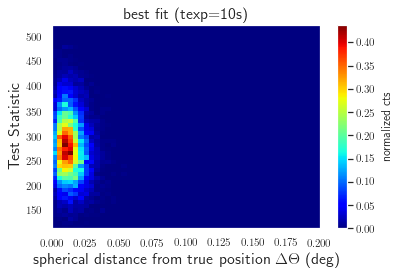

DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION: 170.0
FIT RATIO WITHIN 0.5deg FROM TRUE POSITION: 170.0


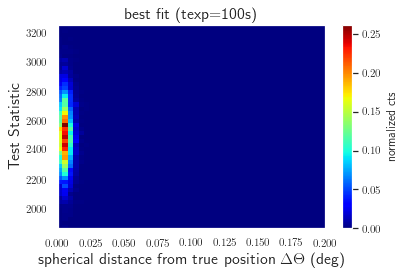

In [24]:
# ========================================================
# !!! TSV & RA/DEC HISTOGRAMS 2D + SPECTRAL HISTOGRAMS !!!
# ========================================================

import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord


for n in range(len(texp)) :  

    # store values ---!
    filename = csvMerged[n]
    
    # load DataFrame and column names ---!
    df = pd.read_csv(path+filename)
    cols = list(df.columns)
#    trials = len(df[cols[0]])
    # drop NaN ---!
    df = df.dropna()
    
    # set arrays ---!
#    trial = np.array(df[cols[0]])
    tsv = np.array(df[cols[12]])
    raSrc001 = np.array(df[cols[5]])
    decSrc001 = np.array(df[cols[6]])
    raFit = np.array(df[cols[7]])
    decFit = np.array(df[cols[8]])
    
    # initialize SphDistance calc ---!
    trueRA = 33.057
    trueDEC = -51.841
    
#    perc = 100 * (len(trial)/trials)
    
    distance_det = []
    d_det = []

    # DETECTION ---!
    # spherical distance (great circle not small angle approx) ---!
    true_coord = SkyCoord(ra = trueRA*u.deg, dec = trueDEC*u.deg, frame='fk5')
    
    for i in range(len(raSrc001)) :
        if decFit[i] >= -90 and decFit[i] <= 90 and 0 <= raFit[i] <= 360 :
            detect_coord = SkyCoord(ra = raSrc001[i]*u.deg, dec = decSrc001[i]*u.deg, frame='fk5')
            dist = float(true_coord.separation(detect_coord).deg)
            distance_det.append(dist)      

            if dist < 0.5 :
                d_det.append(dist)

    perc_det = 100 * (len(d_det)/trials)
#    perc_det = 100 * (len(d_det)/len(distance_det))
    print('DETECTION RATIO WITHIN 0.5deg FROM TRUE POSITION:', perc_det)

    # FIT MAX LIKELIHOOD ---!
    distance_fit = []
    distance_fit_tsv = []
    d_fit = []
    d_tsv = []

    for i in range(len(raFit)) :
        if decFit[i] >= -90 and decFit[i] <= 90 and 0 <= raFit[i] <= 360 :
            fit_coord = SkyCoord(ra = raFit[i]*u.deg, dec = decFit[i]*u.deg, frame='fk5')
            dist = float(true_coord.separation(fit_coord).deg)
            distance_fit.append(dist)         
    
            if dist < 0.5 :
                d_fit.append(dist)
                d_tsv.append(tsv[i])
        
    perc_fit = len(d_fit)/trials * 100
#    perc_fit = len(d_fit)/len(distance_fit) * 100
    print('FIT RATIO WITHIN 0.5deg FROM TRUE POSITION:', perc_fit)
    
    # INITIALIZE PLOT ---!
    fig_hist2D = plt.figure(figsize=(15, 15))
    plt.rc('text', usetex=True)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.set()
    
    # PLOT TSV & DET ---!
#    ax_tsv_det = plt.subplot(321)
#    plot_tsv_det(ax_tsv_det, filename)

    
    # PLOT TSV & FIT ---!
    ax_tsv_fit = plt.subplot(323)
    plot_tsv_fit(ax_tsv_fit, filename)
 
   
    
    plt.show()